# Springboard - Data Science Career Track

## Capstone Project II: Book Recommendations - goodreads.com

Data: https://github.com/zygmuntz/goodbooks-10k

This dataset contains six million ratings for ten thousand most popular (with most ratings) books. There are also:

- books marked to read by the users
- book metadata (author, year, etc.)
- tags/shelves/genres

**Goal of the project: Recommend books to Goodreads.com users**

**Table of contents:**

[1) Data Inspection and Cleaning](#data_cleaning)

[2) Exploratory Data Analysis](#eda)

[3) Recommender](#recommender)


**API Key**

In [1]:
KEY = '0X3crFDSjHUTEHDPOlaFCg'
SECRET = 'ZAxgfS7OnTBnMCzRpwKEwao2TzjZEzO3cVVTWL9W8'

#### Libraries

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



## 1) Data inspection and Cleaning
<a id="data_cleaning"></a>

### 1.1) Tags

***book_tags.csv*** contains tags/shelves/genres assigned by users to books. Tags in this file are represented by their IDs. They are sorted by goodreads_book_id ascending and count descending.

In [3]:
# book_tags
book_tags = pd.read_csv('book_tags.csv')
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


***tags.csv*** translates tag IDs to names.

In [4]:
# tags
tags = pd.read_csv('tags.csv')
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


Let's join these two tables: **tags_df**

In [5]:
# tags_df
tags_df = pd.merge(book_tags, tags, on='tag_id').sort_values('count', ascending=False).reset_index(drop=True)
tags_df

,goodreads_book_id,tag_id,count,tag_name
0,865,30574,596234,to-read
1,2429135,30574,586235,to-read
2,18143977,30574,505884,to-read
3,3,30574,496107,to-read
4,24280,30574,488469,to-read
5,11235712,30574,474954,to-read
6,168668,30574,465640,to-read
7,18405,30574,454565,to-read
8,4981,30574,443942,to-read
9,930,30574,436097,to-read


I don't understand what the last 6 negative values represent in the 'count' column, so I'm going to disconsider them

In [6]:
# disconsider count negative rows
tags_df = tags_df[:-6]
tags_df.tail()

,goodreads_book_id,tag_id,count,tag_name
999901,327246,5141,1,books-for-creators-and-artists
999902,327242,5141,1,books-for-creators-and-artists
999903,327242,22343,1,on-my-bookself-irl
999904,320700,28881,1,sub
999905,327242,32111,1,want-to-read-i-have


In [7]:
# info
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999906 entries, 0 to 999905
Data columns (total 4 columns):
goodreads_book_id    999906 non-null int64
tag_id               999906 non-null int64
count                999906 non-null int64
tag_name             999906 non-null object
dtypes: int64(3), object(1)
memory usage: 30.5+ MB


In [8]:
# number of unique tags
assert len(tags_df.tag_id.unique()) == len(tags_df.tag_name.unique())

len(tags_df.tag_name.unique())

34250

In [9]:
# most common tags
tags_df.tag_name.value_counts().head(10)

to-read              9983
favorites            9881
owned                9858
books-i-own          9799
currently-reading    9776
library              9415
owned-books          9221
fiction              9097
to-buy               8692
kindle               8316
Name: tag_name, dtype: int64

### 1.2) Ratings

***ratings.csv*** contains almost 6 million book ratings by users. Ratings can go from one to five stars, where:

 - **5 stars**: "it was amazing"
 - **4 stars**: "really liked it"
 - **3 stars**: "liked it"
 - **2 stars**: "it was ok"
 - **1 star**: "did not like it"
 


In [10]:
# ratings
ratings = pd.read_csv('ratings.csv')
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [11]:
# info
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
user_id    int64
book_id    int64
rating     int64
dtypes: int64(3)
memory usage: 136.8 MB


In [12]:
# number of books
len(ratings.book_id.unique())

10000

In [13]:
# number of unique users
len(ratings.user_id.unique())

53424

### 1.3) to read

***to_read.csv*** provides IDs of the books marked "to read" by each user.

In [14]:
# to_read
to_read = pd.read_csv('to_read.csv')
to_read.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [15]:
# to_read info
to_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912705 entries, 0 to 912704
Data columns (total 2 columns):
user_id    912705 non-null int64
book_id    912705 non-null int64
dtypes: int64(2)
memory usage: 13.9 MB


### 1.4) books

***books.csv*** has metadata for each book (goodreads IDs, authors, title, average rating, etc.). 

**goodreads IDs**:
    
Each book may have many editions. **goodreads_book_id** and **best_book_id** generally point to the most popular edition of a given book, while goodreads **work_id** refers to the book in the abstract sense.

You can use the goodreads book and work IDs to create URLs as follows:

- https://www.goodreads.com/book/show/17397466
- https://www.goodreads.com/work/editions/24219959

Note that **book_id** in *ratings.csv* and *to_read.csv* maps to **work_id**, not to goodreads_book_id, **meaning that ratings for different editions are aggregated**.

In [16]:
# books
books = pd.read_csv('books.csv')
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


'books_count' is the number of editions for a given work. I'll change this name, for clarity, to **book_editions**:

In [17]:
# renaming the number of editions column
books = books.rename({'books_count': 'book_editions'}, axis=1)

In [18]:
# books info
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
book_id                      10000 non-null int64
goodreads_book_id            10000 non-null int64
best_book_id                 10000 non-null int64
work_id                      10000 non-null int64
book_editions                10000 non-null int64
isbn                         9300 non-null object
isbn13                       9415 non-null float64
authors                      10000 non-null object
original_publication_year    9979 non-null float64
original_title               9415 non-null object
title                        10000 non-null object
language_code                8916 non-null object
average_rating               10000 non-null float64
ratings_count                10000 non-null int64
work_ratings_count           10000 non-null int64
work_text_reviews_count      10000 non-null int64
ratings_1                    10000 non-null int64
ratings_2                    10000 n

 - **book_id, goodreads_book_id, best_book_id, and work_id** seem ok.

In [19]:
len(books.work_id.unique())

10000

In [20]:
# number of unique work_id's
len(books.work_id.unique()) == len(books.goodreads_book_id.unique())

True

 - There are some rows where the **isbn** and **isbn13** number are missing, but for now we will leave it like that and return later if necessary.

In [21]:
# where isbn miss
books[books.isbn.isna()].head()

,book_id,goodreads_book_id,best_book_id,work_id,book_editions,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
105,106,9418327,9418327,14302659,48,NaN,NaN,Tina Fey,2011.0,Bossypants,...,506250,609260,35142,14842,31761,129390,230080,203187,https://images.gr-assets.com/books/1481509554m...,https://images.gr-assets.com/books/1481509554s...
120,121,7604,7604,1268631,370,NaN,NaN,"Vladimir Nabokov, Craig Raine",1955.0,Lolita,...,469836,517990,18107,21091,37205,108664,165477,185553,https://images.gr-assets.com/books/1377756377m...,https://images.gr-assets.com/books/1377756377s...
161,162,49552,49552,3324344,675,NaN,NaN,"Albert Camus, Matthew Ward",1942.0,L’Étranger,...,420600,483623,14836,10563,28920,100140,174957,169043,https://images.gr-assets.com/books/1349927872m...,https://images.gr-assets.com/books/1349927872s...
187,188,10664113,10664113,2936175,115,NaN,NaN,George R.R. Martin,2011.0,A Dance with Dragons,...,365954,424618,20072,2399,10150,53744,147136,211189,https://images.gr-assets.com/books/1327885335m...,https://images.gr-assets.com/books/1327885335s...
202,203,11505797,11505797,16441531,85,NaN,NaN,Jamie McGuire,2011.0,Beautiful Disaster,...,418309,442696,25298,17185,23298,61993,115123,225097,https://images.gr-assets.com/books/1358259032m...,https://images.gr-assets.com/books/1358259032s...


- **Authors**

In [22]:
# number of unique authors
len(books.authors.unique())

4664

- **Original publication year** - there are 21 missing values, but for now I will leave it like that.

In [23]:
# original_publication_year missing values
books['original_publication_year'].isna().sum()

21

- The same with **original_title**

In [24]:
# - The same with **original_title** missing values
books['original_title'].isna().sum()

585

- **Title**

In [25]:
# number of unique titles
len(books.title.unique())

9964

In [26]:
# titles that are not unique
print(books.title.value_counts()[:len([i for i in books.title.value_counts() if i > 1])])

print("\nNumber of not unique titles: {}".format(len([i for i in books.title.value_counts() if i > 1])))

Selected Poems                               4
Stone Soup                                   3
Leviathan                                    2
Perfect                                      2
The Island                                   2
The List                                     2
Pinocchio                                    2
'Salem's Lot                                 2
The Stranger                                 2
Anatomy for the Artist                       2
The Little Mermaid                           2
Bambi                                        2
The Collected Poems                          2
One Flew Over the Cuckoo's Nest              2
The Pact                                     2
The Complete Stories and Poems               2
The Collector                                2
Arcadia                                      2
The Complete Stories                         2
The Witness                                  2
Invisible                                    2
Selected Stor

In [27]:
# not unique titles
titles_not_uniq = books.title.value_counts()[:len([i for i in books.title.value_counts() if i > 1])].index

# check lines
check_titles = books[books.title.isin(titles_not_uniq)]

# number of them
print("Number of rows with non-unique titles: {}".format(check_titles.shape[0]))

# number of different authors
print("Number of different authors: {}".format(len(check_titles.authors.unique())))


Number of rows with non-unique titles: 69
Number of different authors: 66


In [28]:
# which 3 authors repeat?
repeat_auth = check_titles.authors.value_counts()[:3].index

# check again
books[(books.title.isin(titles_not_uniq)) & (books.authors.isin(repeat_auth))].iloc[:, :15]


,book_id,goodreads_book_id,best_book_id,work_id,book_editions,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count
2371,2372,12716613,12716613,17851429,75,399159371,9.780399e+12,Nora Roberts,2012.0,The Witness,The Witness,NaN,4.19,40943,49415
5173,5174,18668066,18668066,26493730,52,399171088,9.780399e+12,Nora Roberts,2014.0,The Collector,The Collector,eng,3.92,15888,22703
7024,7025,26506,26506,1008958,52,385340222,9.780385e+12,Danielle Steel,2007.0,Sisters,Sisters,eng,3.81,13621,14641
7448,7449,6345193,6345193,6448995,44,805090800,9.780805e+12,Paul Auster,2009.0,Invisible,Invisible,eng,3.71,11706,13897
7461,7462,456,456,1128381,50,140178139,9.780140e+12,Paul Auster,1992.0,Leviathan,Leviathan,eng,3.95,10002,11794
7683,7684,59836,59836,1912773,55,440221315,9.780440e+12,Danielle Steel,1986.0,The Gift,The Gift,en-US,3.91,12382,13114


When comparing the title and author columns on these cases we see there is nothing wrong with the data. They just wrote a book with the same title than other author did, and not twice as we can see.

- **language_code** - everything seems to be ok. Regarding the missing values, I will leave it like that for now.

In [29]:
# different languages
books.language_code.value_counts()

eng      6341
en-US    2070
en-GB     257
ara        64
en-CA      58
fre        25
ind        21
spa        20
ger        13
per         7
jpn         7
pol         6
por         6
en          4
dan         3
nor         3
fil         2
ita         2
nl          1
swe         1
vie         1
tur         1
mul         1
rum         1
rus         1
Name: language_code, dtype: int64

In [30]:
# missing values
books[books.language_code.isna()].head()

,book_id,goodreads_book_id,best_book_id,work_id,book_editions,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
44,45,4214,4214,1392700,264,770430074,9.780770e+12,Yann Martel,2001.0,Life of Pi,...,1003228,1077431,42962,39768,74331,218702,384164,360466,https://images.gr-assets.com/books/1320562005m...,https://images.gr-assets.com/books/1320562005s...
131,132,3431,3431,2561472,123,1401308589,9.781401e+12,Mitch Albom,2003.0,The Five People You Meet in Heaven,...,449501,474699,16682,12360,33669,107800,155830,165040,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
203,204,5326,5326,3097440,2380,1561797464,9.781562e+12,Charles Dickens,1843.0,A Christmas Carol,...,394540,441396,11568,6737,21415,93906,153823,165515,https://images.gr-assets.com/books/1406512317m...,https://images.gr-assets.com/books/1406512317s...
236,237,10592,10592,1552134,249,1416524304,9.781417e+12,Stephen King,1974.0,Carrie,...,356814,377650,8264,4564,19479,96352,136054,121201,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
287,288,19691,19691,1112006,117,425172902,9.780425e+12,Tom Clancy,1984.0,The Hunt for Red October,...,270318,278255,2117,9470,13707,49906,95296,109876,https://images.gr-assets.com/books/1281995542m...,https://images.gr-assets.com/books/1281995542s...


- **average_rating** seems ok.

In [31]:
# average rating of all books
books.average_rating.mean()

4.002191000000001

- **ratings_count** or **work_ratings_count**

In [32]:
# question
books[['ratings_count', 'work_ratings_count', 'work_text_reviews_count', 'ratings_1' ,'ratings_2' ,'ratings_3',
       'ratings_4' ,'ratings_5']].head()

,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,3198671,3340896,72586,60427,117415,446835,1001952,1714267
4,2683664,2773745,51992,86236,197621,606158,936012,947718


In [33]:
# check work_ratings_count
(np.sum(books[['ratings_1' ,'ratings_2' ,'ratings_3', 'ratings_4' ,'ratings_5']], axis=1) == 
 books['work_ratings_count']).sum()

10000

In [34]:
# check ratings_count
(np.sum(books[['ratings_1' ,'ratings_2' ,'ratings_3', 'ratings_4' ,'ratings_5']], axis=1) == 
 books['ratings_count']).sum()

14

It is the column **work_ratings_count** that corresponds to the total number of ratings per row/book.

- The columns representing the **ratings** from 1 to 5 seem ok, as **work_text_reviews_count** do.

- Finally, the last two columns - **image_url** and **small_image_url** - represent the image of the cover of the book. 

In [35]:
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,book_editions,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


#### Access GoodReads API using the Goodreads package

In [36]:
from goodreads import client
gc = client.GoodreadsClient(KEY, SECRET)

Get all the **text reviews** for all the books in the data set.

In [119]:
%%script false

# most recent review
most_recent_review = gc.recent_reviews()[0]
most_recent_review

# create dataframe with user's text reviews
reviews_by_users = pd.DataFrame()

for i in range(most_recent_review):
    try:
        reviews_by_users = reviews_by_users.append({'work_id': gc.review(i).book['id']['#text'],
                                                    'title': gc.review(i).book['title'],
                                                    'book_description': gc.review(i).book['description'],
                                                    'publication_year': gc.review(i).book['publication_year'],
                                                    'nr_pages': gc.review(i).book['num_pages'],
                                                    'shelves': gc.review(i).shelves,
                                                    'review': gc.review(i).body}, ignore_index=True)
    except:
        None

# save to file
reviews_by_users.to_csv('text_reviews.csv')

Couldn't find program: 'false'


The file was saved as **text_reviews.csv**

## 2) Exploratory Data Analysis
<a id="eda"></a>

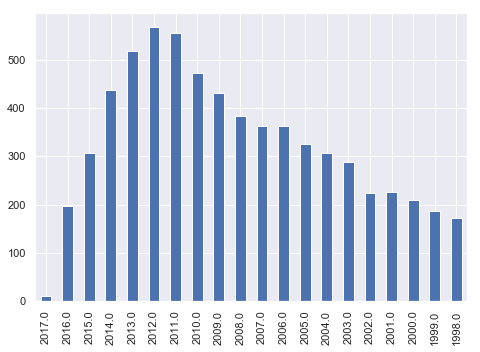

In [49]:
# original_publication_year
books.original_publication_year.value_counts().sort_index(ascending=False).iloc[:20].plot(kind='bar')

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()